## Analysis of dilepton final state from ATLAS OpenData 13TeV dataset

In [1]:
#include <iostream>
#include <fstream>
#include <algorithm>

### Structure of OpenData (13TeV):
- Data is stored in nTuples, i.e. 'trees'
- One event = one entry in the tree
- One variable = one 'branch' in the tree (branch = integers/floats/vectors/booleans etc.)
- All events have the same branches


TChain is used in order to link together data from several nTuples, i.e. it is a 'chain of trees'.
Would typically like one chain for real data and one for MC (background).

In [2]:
/*

1. Reading the dataset and obtaining header variables

*/

TChain *background = new TChain("mini");
TChain *data = new TChain("mini");

In [3]:
TString sample; 
TString path; 
TString type;
vector<Int_t> dataset_IDs;
vector<TString> types;
Int_t DSID;

In [4]:
ifstream infile1("../Input/13TeV/dataset_MCInput.txt");

string name ;

In [5]:
infile1.clear();
infile1.seekg(0, ios::beg);  // Start at the beginning of the file

background->Reset(); // Reset the TChain (if necessary)
DSID = 0;

//while (!infile.fail() && !infile.eof() ){
while (infile1 >> sample >> DSID >> type){
        path = "../Input/13TeV/MC/"+sample;
        background->Add(path);
        dataset_IDs.push_back(DSID);
        types.push_back(type);
        cout << sample << endl;
}

mc_410000.ttbar_lep.2lep.root
mc_364100.Zmumu_PTV0_70_CVetoBVeto.2lep.root
mc_364101.Zmumu_PTV0_70_CFilterBVeto.2lep.root
mc_364102.Zmumu_PTV0_70_BFilter.2lep.root
mc_364103.Zmumu_PTV70_140_CVetoBVeto.2lep.root
mc_364104.Zmumu_PTV70_140_CFilterBVeto.2lep.root
mc_364105.Zmumu_PTV70_140_BFilter.2lep.root
mc_364106.Zmumu_PTV140_280_CVetoBVeto.2lep.root
mc_364107.Zmumu_PTV140_280_CFilterBVeto.2lep.root
mc_364108.Zmumu_PTV140_280_BFilter.2lep.root
mc_364109.Zmumu_PTV280_500_CVetoBVeto.2lep.root
mc_364110.Zmumu_PTV280_500_CFilterBVeto.2lep.root
mc_364111.Zmumu_PTV280_500_BFilter.2lep.root
mc_364112.Zmumu_PTV500_1000.2lep.root
mc_364113.Zmumu_PTV1000_E_CMS.2lep.root
mc_364114.Zee_PTV0_70_CVetoBVeto.2lep.root
mc_364115.Zee_PTV0_70_CFilterBVeto.2lep.root
mc_364116.Zee_PTV0_70_BFilter.2lep.root
mc_364117.Zee_PTV70_140_CVetoBVeto.2lep.root
mc_364118.Zee_PTV70_140_CFilterBVeto.2lep.root
mc_364119.Zee_PTV70_140_BFilter.2lep.root
mc_364120.Zee_PTV140_280_CVetoBVeto.2lep.root
mc_364121.Zee_PTV140_280

In [6]:
ifstream infile2("../Input/13TeV/dataset_dataInput.txt");

In [7]:
data->Reset();
infile2.clear();
infile2.seekg(0, ios::beg);

while (infile2 >> sample){
        path = "../Input/13TeV/Data/"+sample;
        data->Add(path);
}

In [8]:
// Add individual DSIDs to corresponding types
vector<Int_t> Zjets, ttbar, graviton, Zprime, Dibosons, tt;

In [9]:
Zjets.clear();
ttbar.clear();
Dibosons.clear();
graviton.clear();
Zprime.clear();
tt.clear();

for(int j=0; j<types.size(); j++){
    if (types[j] == "Z+jets"){Zjets.push_back(dataset_IDs[j]); }
    else if (types[j] == "ttbar"){ttbar.push_back(dataset_IDs[j]); }
    else if (types[j] == "Graviton"){graviton.push_back(dataset_IDs[j]); }
    else if (types[j] == "Zprime"){Zprime.push_back(dataset_IDs[j]); }
    else if (types[j] == "Dibosons"){Dibosons.push_back(dataset_IDs[j]); }
    else if (types[j] == "tt"){tt.push_back(dataset_IDs[j]); }
}

In [10]:
// Assign branch variables to variables defined below

Int_t lep_n;
Int_t channelNumber;
Float_t XSection, met_et, mcWeight, SumWeights;
Bool_t trigE, trigM;
vector<Int_t*> lep_type, lep_charge;
vector<Float_t*> lep_pt, lep_E, lep_phi, lep_eta, lep_etcone20, lep_ptcone30, lep_z0, lep_trackd0pvunbiased, lep_tracksigd0pvunbiased;
vector<Bool_t*> trigMatched, lep_isTightID;

In [11]:
Float_t scaleFactor_PILEUP, scaleFactor_ELE, scaleFactor_MUON, scaleFactor_BTAG, scaleFactor_lepTRIGGER;

In [12]:
// Obtain header variables

// For MC:  
background->SetBranchAddress("lep_n",      &lep_n);
background->SetBranchAddress("lep_charge", &lep_charge);
background->SetBranchAddress("lep_type",   &lep_type);
background->SetBranchAddress("lep_pt",     &lep_pt);
background->SetBranchAddress("lep_eta",    &lep_eta);
background->SetBranchAddress("lep_phi",    &lep_phi);
background->SetBranchAddress("lep_E",      &lep_E);
background->SetBranchAddress("met_et",     &met_et); 
background->SetBranchAddress("channelNumber", &channelNumber);
background->SetBranchAddress("mcWeight", &mcWeight);
background->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP );
background->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE ); 
background->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON ); 
background->SetBranchAddress("scaleFactor_BTAG", &scaleFactor_BTAG );
background->SetBranchAddress("scaleFactor_LepTRIGGER", &scaleFactor_lepTRIGGER );
background->SetBranchAddress("lep_isTightID", &lep_isTightID); 
background->SetBranchAddress("lep_ptcone30", &lep_ptcone30);
background->SetBranchAddress("lep_etcone20", &lep_etcone20);
background->SetBranchAddress("trigE", &trigE);
background->SetBranchAddress("trigM", &trigM);
background->SetBranchAddress("SumWeights", &SumWeights);
background->SetBranchAddress("XSection", &XSection); 
background->SetBranchAddress("lep_z0", &lep_z0);
background->SetBranchAddress("lep_trackd0pvunbiased", &lep_trackd0pvunbiased);
background->SetBranchAddress("lep_tracksigd0pvunbiased", &lep_tracksigd0pvunbiased);

// For data:
data->SetBranchAddress("lep_n",      &lep_n);
data->SetBranchAddress("lep_charge", &lep_charge);
data->SetBranchAddress("lep_type",   &lep_type);
data->SetBranchAddress("lep_pt",     &lep_pt);
data->SetBranchAddress("lep_eta",    &lep_eta);
data->SetBranchAddress("lep_phi",    &lep_phi);
data->SetBranchAddress("lep_E",      &lep_E);
data->SetBranchAddress("met_et",     &met_et); 
data->SetBranchAddress("channelNumber", &channelNumber);
data->SetBranchAddress("trigE", &trigE); 
data->SetBranchAddress("trigM", &trigM);
data->SetBranchAddress("lep_isTightID", &lep_isTightID);
data->SetBranchAddress("lep_ptcone30", &lep_ptcone30); 
data->SetBranchAddress("lep_etcone20", &lep_etcone20);
data->SetBranchAddress("lep_z0", &lep_z0);
data->SetBranchAddress("lep_trackd0pvunbiased", &lep_trackd0pvunbiased);
data->SetBranchAddress("lep_tracksigd0pvunbiased", &lep_tracksigd0pvunbiased);


In [13]:
/*

2. Analysis of data and obtaining the desired final states by cuts

*/

// Declaring map containing 1D histograms, in which each histogram contains values of type Int_t
map<Int_t, TH1*> hist_mll; 
map<Int_t, TH1*> hist_lep_pt; 
map<Int_t, TH1*> hist_met;

// Assign each DSID in datasetIDs as a unique input element i in histograms
for(const auto & i:dataset_IDs){
    hist_mll[i] = new TH1F(); 
    hist_lep_pt[i] = new TH1F(); 
    hist_met[i] = new TH1F();
}

for(const auto & i:dataset_IDs){
//    cout << i << endl;
    hist_mll[i]->SetNameTitle("hist_mll", "Invariant mass"); 
    hist_lep_pt[i]->SetNameTitle("hist_lep_pt", "Lepton pT"); 
    hist_met[i]->SetNameTitle("hist_met", "Missing ET");
    hist_mll[i]->SetBins(50,0,5000); 
    hist_lep_pt[i]->SetBins(50,0,1000);
    hist_met[i]->SetBins(50,0,5000); 
}

In [14]:
// Create histograms for recorded data events
hist_mll_d = new TH1F(); 
hist_lep_pt_d = new TH1F(); 
hist_met_d = new TH1F();

In [15]:
hist_mll_d->SetNameTitle("hist_mll", "Invariant mass");
hist_lep_pt_d->SetNameTitle("hist_lep_pt", "Lepton pT"); 
hist_met_d->SetNameTitle("hist_met", "Missing ET");
hist_mll_d->SetBins(50,0,5000); 
hist_lep_pt_d->SetBins(50,0,1000);
hist_met_d->SetBins(50,0,5000);

In [16]:
// Create histograms for signal + backgrounds events
hist_mll_sb = new TH1F();
hist_lep_pt_sb = new TH1F();
hist_met_sb = new TH1F();

In [17]:
hist_mll_sb->SetNameTitle("", "Invariant mass"); 
hist_lep_pt_sb->SetNameTitle("hist_lep_pt", "Lepton pT"); 
hist_met_sb->SetNameTitle("hist_met", "Missing ET");
hist_mll_sb->SetBins(50,0,5000); 
hist_lep_pt_sb->SetBins(50,0,1000);
hist_met_sb->SetBins(50,0,5000);

In [18]:
// Lorentz vectors for decay products
TLorentzVector l1, l2, dileptons, l1temp, l2temp;

In [19]:
TChain *dataset = new TChain("mini");
TString channel;
vector<Int_t> DSIDs;// datasetIDs
int isData; 
int nentries; //number of entries in each input file
int zjets, Ttbar, dibosons, gravitons, zprime, j, Tt; // counters
Float_t W; // weight
Double_t L;   //Integrated luminosity

L = 10000.; //pb
DSIDs.push_back(0);
j = zjets = Ttbar = gravitons = zprime = dibosons = Tt = 0;

### Cuts for the individual lepton pairs:
The primary vertex chosen is the one with the highest summed $p_T^2$ of tracks with transverse momentum $p_T > 0.5$GeV associated with the vertex.

1. __Preselection and final cut requirements__:
    - Require only 2 leptons in the final state
    - Require same-flavour leptons
    - Muon pair must have opposite charges
    - Electron pair has no requirement on opposite charges due to the higher probability of charge misidentification for high $E_T$-electrons (if we had an opposite charge requirement).
    

2. __Reconstructed electrons must__
   - have $E_T > 30$GeV
   - have $|\eta| < 2.47$ (in order to pass through the fine-granularity region of the EM calorimeter)
   - be outside the range $1.37 < |\eta| < 1.52$ (corresponding to the transition region between the barrel and endcap EM calorimeters)
   - have $|z_0\sin\Theta| < 0.5$mm (in order to be consistent with the primary vertex along the beamline)
   - have $|d_0/\sigma(d_0)| < 5$ (in order to be consistent with the primary vertex transverse to the beamline)
   

3. __Reconstructed muons must__
    - have $p_T > 30$GeV
    - have $|\eta| < 2.5$ (in order to pass through the fine-granularity region of the EM calorimeter)
    - be outside the range $1.01 < |\eta| < 1.1$ (corresponding to the transition region between the barrel and endcap EM calorimeters)
    - have $|z_0\sin\Theta| < 0.5$mm (in order to be consistent with the primary vertex along the beamline)
    - have $|d_0/\sigma(d_0)| < 3$ (in order to be consistent with the primary vertex transverse to the beamline)

In [20]:
// Reset histograms (in case you have filled them before) 
for(const auto & i:dataset_IDs){ 
    hist_mll[i]->Reset(); 
    hist_lep_pt[i]->Reset(); 
    hist_met[i]->Reset();
}

hist_mll_d->Reset();
hist_lep_pt_d->Reset(); 
hist_met_d->Reset(); 



// Loop through all events in background and data separately
for(isData = 0; isData<2; isData++){
    if(isData == 1){
        nentries = data->GetEntries();
        dataset = data;
        cout << "Running over data..." << endl; 
        cout << "Number entries: " << nentries << endl;
    }
    else {
        nentries = background->GetEntries();
        dataset = background;
        cout << "Running over background..." << endl;
        cout << "Number entries: " << nentries << endl;
    }

    //running over all events within data and background
    for (int i = 0; i < nentries; i++){    //i<nentries 
        if(i%1000000 == 0 && i>0){ cout << "------------------------------------------" << endl;}
        if(i%1000000 == 0 && i>0){ cout << i/1000000 << " million events processed" << endl;}
        if(i%1000000 == 0 && i>0){ cout << "------------------------------------------" << endl;}

         // We "pull out" the i'th entry in the chain. The variables are now 
         // available through the names we have given them.
        dataset->GetEntry(i);
    
        
        // Preselection (variables are stored in the TTree with unit MeV, so we need to divide by 1000 
        // to get GeV, which is a more practical and commonly used unit):

        
        // Cut #1: Require (exactly) 2 leptons
        if(lep_n != 2){ continue; }
        // Cut #2: Require same flavour (2 electrons or 2 muons)
        if(*lep_type[0] != *lep_type[1]){ continue; }

        // Set Lorentz vectors
        l1.SetPtEtaPhiE(*lep_pt[0]/1000., *lep_eta[0], *lep_phi[0], *lep_E[0]/1000.);
        l2.SetPtEtaPhiE(*lep_pt[1]/1000., *lep_eta[1], *lep_phi[1], *lep_E[1]/1000.);

        // Cut #3: Cut on z_0 impact parameter
        if( fabs(*lep_z0[0]*TMath::Sin(l1.Theta())) > 0.5 ){ continue; }
        if( fabs(*lep_z0[1]*TMath::Sin(l2.Theta())) > 0.5 ){ continue; }

        // Cut #4: Lepton isolation cuts
        if( *lep_ptcone30[0]/(*lep_pt[0]) > 0.15 ){ continue; }
        if( *lep_ptcone30[1]/(*lep_pt[1]) > 0.15 ){ continue; }

        if( *lep_etcone20[0]/(*lep_pt[0]) > 0.15 ){ continue; }
        if( *lep_etcone20[1]/(*lep_pt[1]) > 0.15 ){ continue; }

        if( *lep_etcone20[0]/(*lep_pt[0]) < -0.1 || *lep_etcone20[0]/(*lep_pt[0]) > 0.2 ){ continue; } // || = or operator
        if( *lep_etcone20[1]/(*lep_pt[1]) < -0.1 || *lep_etcone20[1]/(*lep_pt[1]) > 0.2 ){ continue; } // || = or operator

        if( *lep_pt[0]/1000.0 < 30 ){ continue; }        
        if( *lep_pt[1]/1000.0 < 30 ){ continue; }       
       
        // Identify leptons
        if( fabs(*lep_type[0]) == 11 ){ channel = "ee"; }
        if( fabs(*lep_type[0]) == 13 ){ channel = "uu"; }
        
        
        //Cuts on individual muons and electrons:       
        // Electrons
        if( channel == "ee")){
            if( fabs(*lep_eta[0]) > 2.47 ){ continue; }
            if( fabs(*lep_eta[0]) > 1.37 && abs(*lep_eta[0]) < 1.52){ continue; }
            if( *lep_E[0]/1000.0 < 30 ){ continue; }
            if( fabs(*lep_trackd0pvunbiased[0]/(*lep_tracksigd0pvunbiased[0])) > 5 ){ continue; }

            if( *lep_E[1]/1000.0 < 30 ){ continue; }
            if( fabs(*lep_eta[1]) > 2.47 ){ continue; }
            if( fabs(*lep_eta[1]) > 1.37 && abs(*lep_eta[1]) < 1.52){ continue; }
            if( fabs(*lep_trackd0pvunbiased[1]/(*lep_tracksigd0pvunbiased[1])) > 5 ){ continue; }
        }

        // Muons
        if( channel == "uu")){
            // Require opposite charge
            if(*lep_charge[0] == *lep_charge[1]){ continue; }

            if( *lep_pt[0]/1000.0 < 30 ){ continue; }  //25 GeV = standard cut for triggers for good accuracy
            if( fabs(*lep_eta[0]) > 2.5 ){ continue; }
            if( fabs(*lep_eta[0]) > 1.01 && abs(*lep_eta[0]) < 1.1){ continue; }
            if( fabs(*lep_trackd0pvunbiased[0]/(*lep_tracksigd0pvunbiased[0])) > 3 ){ continue; }

            if( *lep_pt[1]/1000.0 < 30 ){ continue; }
            if( fabs(*lep_eta[1]) > 2.5 ){ continue; }
            if( fabs(*lep_eta[1]) > 1.01 && abs(*lep_eta[1]) < 1.1){ continue; }
            if( fabs(*lep_trackd0pvunbiased[1]/(*lep_tracksigd0pvunbiased[1])) > 3 ){ continue; }
        }

        // If an event passes all criterias above then obtain invariant mass, pT and missing transverse E
               
        dileptons = l1 + l2;
        if (dileptons.M() < 80){ continue; }
        
        if(isData == 1)
        {
            hist_mll_d->Fill(dileptons.M());
            hist_lep_pt_d->Fill(l1.Pt());
            hist_lep_pt_d->Fill(l2.Pt()); 
            hist_met_d->Fill(met_et/1000.); 
        }
        
        else
        {
            j++;
            DSIDs.push_back(channelNumber);
            
            // Count number of events included in plotting within each background and signal
            if(std::find(Zjets.begin(), Zjets.end(), channelNumber) != Zjets.end()){zjets++; }
            if(std::find(ttbar.begin(), ttbar.end(), channelNumber) != ttbar.end()){Ttbar++; }
            if(std::find(graviton.begin(), graviton.end(), channelNumber) != graviton.end()){gravitons++; }
            if(std::find(Zprime.begin(), Zprime.end(), channelNumber) != Zprime.end()){zprime++; }
            if(std::find(Dibosons.begin(), Dibosons.end(), channelNumber) != Dibosons.end()){dibosons++; }

            // Scaling
            W = (XSection*L/SumWeights)*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_BTAG*scaleFactor_lepTRIGGER; // *scaleFactor_JVFSF*scaleFactor_ZVERTEX; 

            // Fill histograms
            // (signal + background)
            hist_mll_sb->Fill(dileptons.M(), W);
            hist_lep_pt_sb->Fill(l1.Pt(), W);
            hist_lep_pt_sb->Fill(l2.Pt(), W);
            hist_met_sb->Fill(met_et/1000., W);
            
            // (background)
            hist_mll[channelNumber]->Fill(dileptons.M(), W);
            hist_lep_pt[channelNumber]->Fill(l1.Pt(), W);
            hist_lep_pt[channelNumber]->Fill(l2.Pt(), W);
            hist_met[channelNumber]->Fill(met_et/1000., W);            
        }
    }
}
cout << "Done!" << endl;

Running over background...
Number entries: 63330475
------------------------------------------
1 million events processed
------------------------------------------
------------------------------------------
2 million events processed
------------------------------------------
------------------------------------------
3 million events processed
------------------------------------------
------------------------------------------
4 million events processed
------------------------------------------
------------------------------------------
5 million events processed
------------------------------------------
------------------------------------------
6 million events processed
------------------------------------------
------------------------------------------
7 million events processed
------------------------------------------
------------------------------------------
8 million events processed
------------------------------------------
------------------------------------------
9

------------------------------------------
10 million events processed
------------------------------------------
------------------------------------------
11 million events processed
------------------------------------------
------------------------------------------
12 million events processed
------------------------------------------
Done!


In [21]:
cout << "zjets: " << zjets << ", ttbar: " << Ttbar << ", gravitons: " << gravitons << ", Zprime: " << zprime << ", dibosons: " << dibosons << ", tt: " << Tt << endl;
cout << "DSIDs size: " << DSIDs.size() <<  endl;

zjets: 1374322, ttbar: 15781, gravitons: 5126, Zprime: 0, dibosons: 655949, tt: 0
DSIDs size: 2051179


### Background event histograms
Assigning backgrounds according to their dataset ID's.

In [22]:
/*

3. Assign DSID histograms to corresponding background event histograms.

Make a new set of histograms, each corresponding to the different background categories, instead of the unique
dataset IDs. These histograms are made with the same range and binnings as above.
*/
map<TString, TH1*> H_mll; 
map<TString, TH1*> H_lep_pt;
map<TString, TH1*> H_met;

In [23]:
vector<TString> Backgrounds;

Adjusting the order of backgrounds according to how many events have been generated for each, in an ascending order.

In [24]:
// Must define the proper backgrounds for this dataset
Backgrounds = {"ttbar", "Dibosons", "Z+jets"};

In [25]:
for(const auto & i:Backgrounds){
    cout << "Background: " << i << endl;
    H_mll[i] = new TH1F();
    H_lep_pt[i] = new TH1F(); 
    H_met[i] = new TH1F();
}

// Reset histograms (in case you have filled them before) 
for(const auto i:Backgrounds){
    H_mll[i]->Reset();
    H_lep_pt[i]->Reset();
    H_met[i]->Reset();
}


Background: ttbar
Background: Dibosons
Background: Z+jets


In [26]:
// Define properties of background histograms
for(const auto & i:Backgrounds){
    H_mll[i]->SetNameTitle("hist_mll", "Invariant mass");
    H_lep_pt[i]->SetNameTitle("hist_lep_pt", "Lepton pT");
    H_met[i]->SetNameTitle("hist_met", "Missing ET");
    H_mll[i]->SetBins(50,0,5000); 
    H_lep_pt[i]->SetBins(50,0,1000);
    H_met[i]->SetBins(50,0,5000);
}

In [27]:
for(const auto i:dataset_IDs){
    if (std::find(ttbar.begin(), ttbar.end(), i) != ttbar.end()){
        H_mll["ttbar"]->Add(hist_mll[i]); 
        H_lep_pt["ttbar"]->Add(hist_lep_pt[i]);
        H_met["ttbar"]->Add(hist_met[i]);
//        cout << "Found " << i << " in ttbar" << "\n";
    }
    else if(std::find(Dibosons.begin(), Dibosons.end(), i) != Dibosons.end()){
        H_mll["Dibosons"]->Add(hist_mll[i]); 
        H_lep_pt["Dibosons"]->Add(hist_lep_pt[i]);
        H_met["Dibosons"]->Add(hist_met[i]);
//        cout << "Found " << i << " in Dibosons" << "\n"; 
    }

    else if(std::find(Zjets.begin(), Zjets.end(), i) != Zjets.end()){
        H_mll["Z+jets"]->Add(hist_mll[i]);
        H_lep_pt["Z+jets"]->Add(hist_lep_pt[i]);
        H_met["Z+jets"]->Add(hist_met[i]);
//        cout << "Found " << i << " in Zjets" << "\n"; 
    }

}


In [28]:
//Making new map containing the colours wanted for each background process, and set the colours of the histogram

map<TString, Int_t> colors;

colors["graviton"] = 860; //kAzure;
colors["ttbar"] = 632; //kRed;
colors["Zprime"] = 840; //kTeal;
colors["Dibosons"] = 416; //kGreen;
colors["Z+jets"] = 400; //kYellow; 

for(const auto h:Backgrounds){
    H_mll[h]->SetFillColor(colors[h]); 
    H_met[h]->SetFillColor(colors[h]);
    H_lep_pt[h]->SetFillColor(colors[h]);
    
    H_mll[h]->SetLineColor(colors[h]); 
    H_met[h]->SetLineColor(colors[h]);
    H_lep_pt[h]->SetLineColor(colors[h]);
}

In [29]:
/*

4. Stack the background histograms

For each variable we need to stack the backgrounds on top of each other, which is done by using the THStack class. 
In the example below we do this for two variables; invariant mass and missing ET.

*/

THStack *stack_mll = new THStack("Invariant mass", "");
THStack *stack_met = new THStack("Missing ET", ""); 
THStack *stack_lep_pt = new THStack("Lepton pT", "");

for(const auto h:Backgrounds){
    // Remove previously stacked histograms  
    stack_mll->RecursiveRemove(H_mll[h]);
    stack_met->RecursiveRemove(H_met[h]);
    stack_lep_pt->RecursiveRemove(H_lep_pt[h]);

    //Add new stacked histograms
    stack_mll->Add(H_mll[h]);
    stack_met->Add(H_met[h]);
    stack_lep_pt->Add(H_lep_pt[h]); 
}


### Background + signal histogram
Add all background events (Z, W, dibosons and jets) to signal (graviton).

In [43]:
gStyle->SetLegendBorderSize(0); // Remove (default) border around legend
TLegend *leg = new TLegend(0.65, 0.60, 0.9, 0.85);

input_line_120:3:10: error: redefinition of 'leg'
TLegend *leg = new TLegend(0.65, 0.60, 0.9, 0.85);
         ^
input_line_81:3:10: note: previous definition is here
TLegend *leg = new TLegend(0.65, 0.60, 0.9, 0.85);
         ^


In [31]:
leg->Clear();
leg->AddEntry(hist_mll_sb, "Graviton+background", "f");

// Add your histograms to the legend
for(const auto i:Backgrounds){
    leg->AddEntry(H_mll[i], i, "f");  
}
leg->AddEntry(hist_mll_d, "Data", "lep");

In [32]:
TCanvas *C = new TCanvas("c", "c", 600, 600);
gPad->SetLogy(); // Set logarithmic y-axis

In [33]:
hist_mll_d->SetLineColor(kBlack);
hist_mll_d->SetMarkerStyle(kFullCircle);
hist_mll_d->SetMarkerColor(kBlack);

In [34]:
hist_mll_sb->SetFillColor(860); //kAzure

If there are less statistics, then it is more likely that the MC samples and real data will differ as 
MC predicts the amount of events one can expect at a certain range of e.g. m_ll. As long as the number of 
events of MC and real data do not differ too much at high statistics, e.g. 10^6 events,
then MC is correct. If they do, then there is something wrong with the theory modelling the MC.

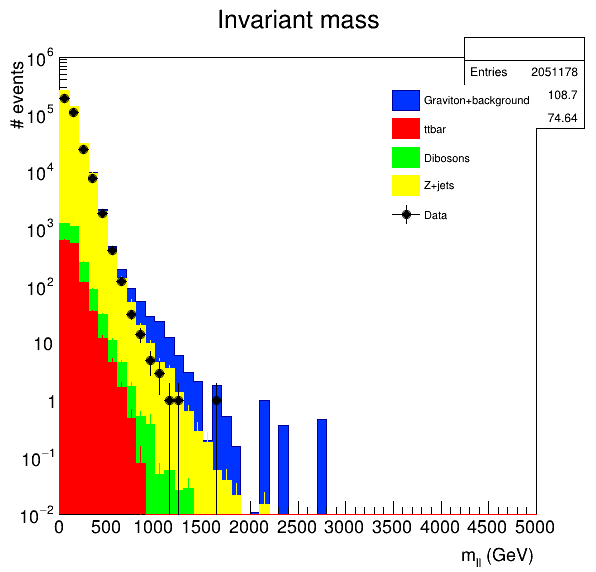

In [35]:
hist_mll_sb->Draw("hist");
hist_mll_sb->SetMaximum(1E6);     //set maximum range on axis
hist_mll_sb->SetMinimum(1e-2);
hist_mll_sb->GetXaxis()->SetLimits(0, 5000);
hist_mll_sb->GetYaxis()->SetTitle("# events");
hist_mll_sb->GetYaxis()->SetTitleOffset(1.3);
hist_mll_sb->GetXaxis()->SetTitle("m_{ll} (GeV)");
hist_mll_sb->GetXaxis()->SetTitleOffset(1.3);
stack_mll->Draw("same AH");
hist_mll_d->Draw("same E");
leg->Draw();
C->Draw();


In [36]:
hist_met_d->SetLineColor(kBlack);
hist_met_d->SetMarkerStyle(kFullCircle);
hist_met_d->SetMarkerColor(kBlack);

In [37]:
hist_met_sb->SetFillColor(860);  //kAzure

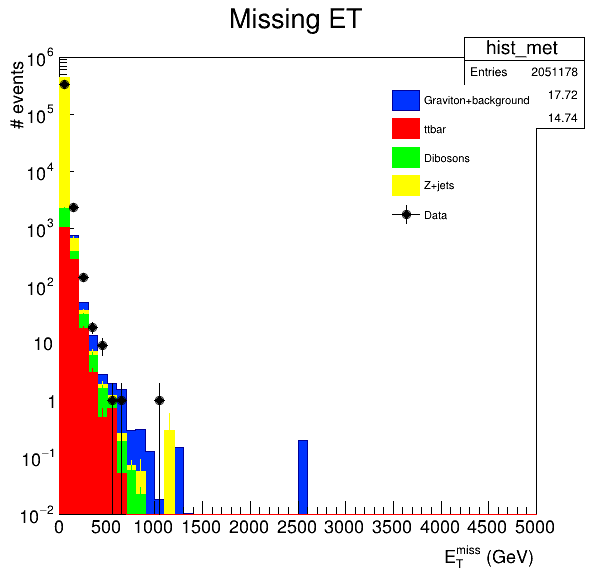

In [38]:
hist_met_sb->Draw("hist"); 
hist_met_sb->SetMaximum(1E6);
hist_met_sb->SetMinimum(1E-2); 
hist_met_sb->GetYaxis()->SetTitle("# events");
hist_met_sb->GetYaxis()->SetTitleOffset(1.3); 
hist_met_sb->GetXaxis()->SetTitle("E_{T}^{miss} (GeV)");
hist_met_sb->GetXaxis()->SetTitleOffset(1.3);
stack_met->Draw("same AH");
hist_met_d->Draw("same e");
leg->Draw();
C->Draw();

/*
Often more difficult to model E_miss
*/

In [39]:
hist_lep_pt_d->SetLineColor(kBlack); 
hist_lep_pt_d->SetMarkerStyle(kFullCircle); 
hist_lep_pt_d->SetMarkerColor(kBlack);

In [40]:
hist_lep_pt_sb->SetFillColor(860); //kAzure

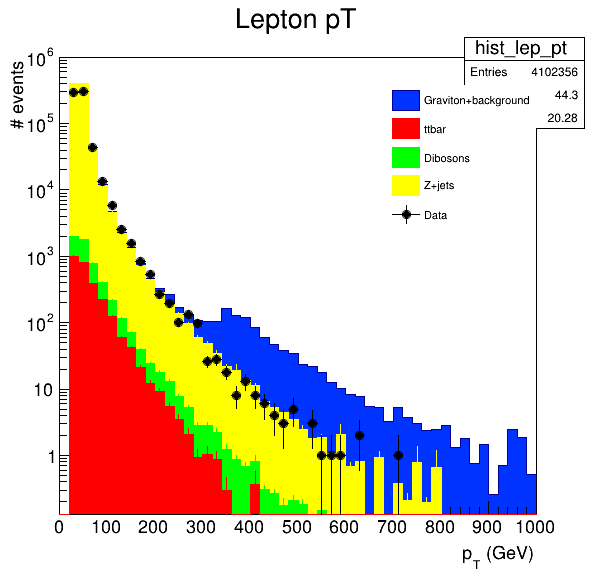

In [41]:
hist_lep_pt_sb->Draw("hist"); 
hist_lep_pt_sb->SetMaximum(1E6); 
hist_lep_pt_sb->GetYaxis()->SetTitle("# events");
hist_lep_pt_sb->GetYaxis()->SetTitleOffset(1.3); 
hist_lep_pt_sb->GetXaxis()->SetTitle("p_{T} (GeV)");
hist_lep_pt_sb->GetXaxis()->SetTitleOffset(1.3);
stack_lep_pt->Draw("same AH");
hist_lep_pt_d->Draw("same e"); 
leg->Draw();
C->Draw();

/*
natural to also include ratio of events between data/MC --> Add another pad to the canvas including this!
*/

In [42]:
//cout << "Dibosons H_met: " << H_met.GetEntries() << " entries"<< endl;